In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,2.885342,41.0,2.642750,1.011835,17.944358,1.598611,4.526
1,2.881215,21.0,2.497626,0.985840,49.000000,1.452529,3.585
2,2.375521,52.0,2.411919,1.035886,23.622024,1.596228,3.413
3,1.961173,52.0,2.506363,1.039750,23.769729,1.476979,3.422
4,2.009179,52.0,2.182122,1.050537,20.322401,1.462838,2.697
...,...,...,...,...,...,...,...
14884,1.926785,28.0,2.603665,1.071567,32.264532,1.739587,1.168
14885,1.249120,25.0,2.246209,1.064581,29.068884,1.600189,0.781
14886,1.303840,17.0,2.281566,1.058344,31.733263,1.525003,0.923
14887,1.366455,18.0,2.308574,1.082552,27.221315,1.457124,0.847


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14889 entries, 0 to 14888
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      14889 non-null  float64
 1   HouseAge    14889 non-null  float64
 2   AveRooms    14889 non-null  float64
 3   AveBedrms   14889 non-null  float64
 4   Population  14889 non-null  float64
 5   AveOccup    14889 non-null  float64
 6   Price       14889 non-null  float64
dtypes: float64(7)
memory usage: 814.4 KB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
count,14889.000000,14889.000000,14889.000000,14889.000000,14889.000000,14889.000000,14889.000000
mean,1.933673,28.892538,2.298884,1.024695,36.343690,1.689283,2.043730
std,0.384877,12.308899,0.218947,0.028318,9.572570,0.157067,1.064923
min,1.121383,2.000000,1.744064,0.969137,17.349352,1.373450,0.149990
25%,1.644810,19.000000,2.146279,1.004228,29.461840,1.574249,1.234000
50%,1.912799,29.000000,2.301573,1.022379,34.985711,1.680560,1.841000
75%,2.193741,37.000000,2.448672,1.042864,41.821047,1.792894,2.616000
max,2.990652,52.000000,2.877453,1.105469,68.687699,2.074932,5.000010


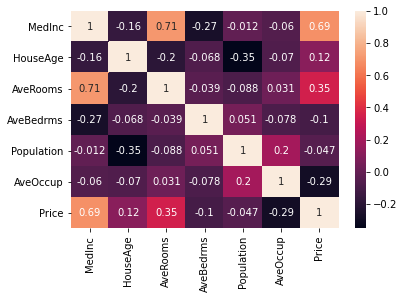

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

In [8]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
col = df.columns
for i in col:
    df[[i]] = std.fit_transform(df[[i]]) 

In [9]:
from sklearn.model_selection import train_test_split,cross_val_score

In [10]:
X = df.drop(columns=['Price'])
y = df['Price']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [12]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((11911, 6), (2978, 6), (11911,), (2978,))

In [13]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
10612,0.142698,-0.235004,0.573303,-0.387068,0.950517,0.282995
32,-0.730936,1.796115,-0.315533,0.358313,-0.091451,-1.001430
6035,-0.327878,-0.478738,-1.525781,1.641348,-1.092672,-0.353218
9275,0.491608,-1.047451,0.134001,-0.654307,-0.081157,-0.472912
6370,0.933222,0.821178,-0.580251,-0.572502,0.341290,-1.625370
...,...,...,...,...,...,...
11808,-0.145268,-0.966206,0.436700,0.777917,0.454469,-1.179095
6012,1.083409,0.902423,-0.270362,-0.681700,-1.412235,-0.070830
13955,-0.097144,-1.616164,-0.043068,-0.929514,1.384700,-0.361211
6558,-2.085327,0.333710,-0.989247,-0.802353,-1.180885,-0.732413


In [14]:
models = []
models.append(('Linear Regression',LinearRegression()))
models.append(('Ridge Regression',Ridge()))
models.append(('Lasso Regression',Lasso()))
models.append(('Decison Tree Regressor',DecisionTreeRegressor()))
models.append(('Random Forest Regressor',RandomForestRegressor()))
models.append(('SGD Regressor : ',SGDRegressor(random_state=100)))
models.append(('Gradient BoostRegressor',GradientBoostingRegressor()))

Linear Regression
Train Score:  0.6209440367898487
Test Score:  0.6433723824193226
Mean Squared error:  0.36120489140607775
Mean Absolute error:  0.4616283643069003
Cross validation Score:  0.5730067266749806



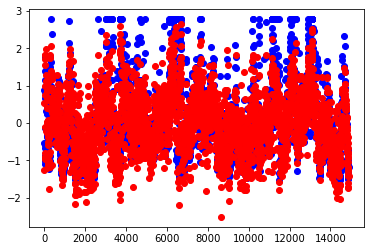


Ridge Regression
Train Score:  0.6209440139982458
Test Score:  0.6433697722266185
Mean Squared error:  0.3612075351003004
Mean Absolute error:  0.4616296058916936
Cross validation Score:  0.5729975343469207



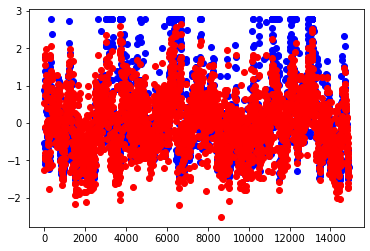


Lasso Regression
Train Score:  0.0
Test Score:  -0.00018009730386903122
Mean Squared error:  1.0130172920537674
Mean Absolute error:  0.7962221869637081
Cross validation Score:  -0.10950004281207923



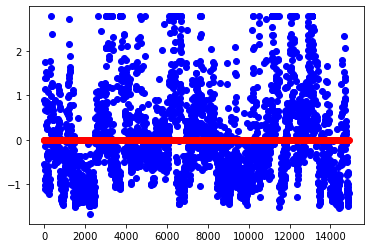


Decison Tree Regressor
Train Score:  1.0
Test Score:  0.4038034985229869
Mean Squared error:  0.6038486139508561
Mean Absolute error:  0.5694952959157662
Cross validation Score:  0.25214645529281243



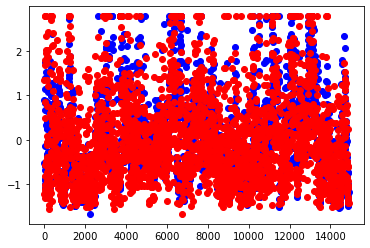


Random Forest Regressor
Train Score:  0.9542255729150398
Test Score:  0.6850432239196786
Mean Squared error:  0.31899920952130073
Mean Absolute error:  0.41968508211232936
Cross validation Score:  0.6038336203752079



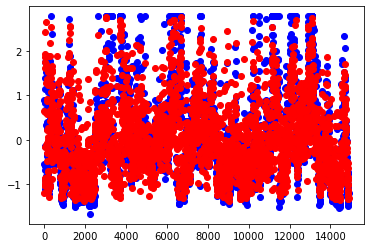


SGD Regressor : 
Train Score:  0.6205417063608889
Test Score:  0.6434275853814548
Mean Squared error:  0.3611489799203731
Mean Absolute error:  0.46060798609545994
Cross validation Score:  0.5716400397164201



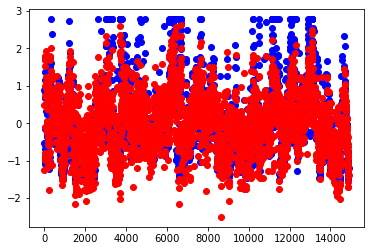


Gradient BoostRegressor
Train Score:  0.7056770025758584
Test Score:  0.6935963684187356
Mean Squared error:  0.31033628641141714
Mean Absolute error:  0.41475761066508166
Cross validation Score:  0.6119235015889128



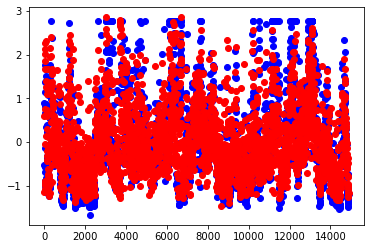

In [15]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("Train Score: ",model.score(X_train,y_train))
    print("Test Score: ",model.score(X_test,y_test))
    print("Mean Squared error: ",mean_squared_error(y_test,pred))
    print("Mean Absolute error: ",mean_absolute_error(y_test,pred))
    cv_results = cross_val_score(model,X,y,cv=5)
    print("Cross validation Score: ",cv_results.mean())
    actual_pred = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
    print()
    plt.scatter(actual_pred['Actual'].index,actual_pred['Actual'],color='blue')
    plt.scatter(actual_pred['Predicted'].index,actual_pred['Predicted'],color='red')
    plt.show()
    print()

### Random Forest Regressor and Gradient boost Regressor are giving the best Scores among the used models i.e 60% and 61% CV Scores Respectively.
- HyperParameter Tuning on Random Forest Regressor using GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
tuned_parameters = {'max_depth': [70,80,90], 'min_samples_split': [40,50,60]}

In [18]:
grid_search  = GridSearchCV(RandomForestRegressor(),tuned_parameters,cv=5)

In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [70, 80, 90],
                         'min_samples_split': [40, 50, 60]})

In [20]:
grid_search.best_params_

{'max_depth': 80, 'min_samples_split': 40}

Train Score:  0.7872459149595329
Test Score:  0.6965451154238473
Mean Squared error:  0.30734969258284345
Mean Absolute error:  0.40973241953107503
Cross validation Score:  0.6138569257492106



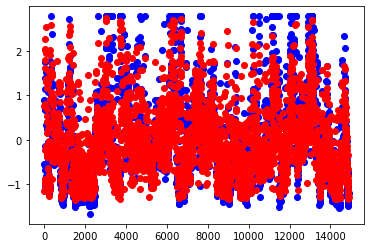

In [21]:
model = RandomForestRegressor(max_depth=80,min_samples_split=40)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("Train Score: ",model.score(X_train,y_train))
print("Test Score: ",model.score(X_test,y_test))
print("Mean Squared error: ",mean_squared_error(y_test,pred))
print("Mean Absolute error: ",mean_absolute_error(y_test,pred))
cv_results = cross_val_score(model,X,y,cv=5)
print("Cross validation Score: ",cv_results.mean())
actual_pred = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
print()
plt.scatter(actual_pred['Actual'].index,actual_pred['Actual'],color='blue')
plt.scatter(actual_pred['Predicted'].index,actual_pred['Predicted'],color='red')
plt.show()
print()

#### Changes in hyperparameters is not showing much impact on Gradient Boost Regressor.

Train Score:  0.7054826262459177
Test Score:  0.6933957394476447
Mean Squared error:  0.31053949043192314
Mean Absolute error:  0.41487222080001274
Cross validation Score:  0.6126264943782838



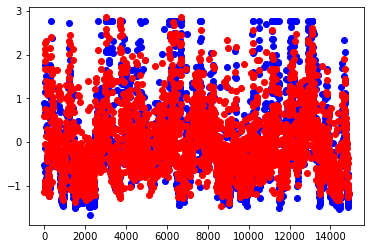

In [32]:
model = GradientBoostingRegressor(min_samples_split=10)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("Train Score: ",model.score(X_train,y_train))
print("Test Score: ",model.score(X_test,y_test))
print("Mean Squared error: ",mean_squared_error(y_test,pred))
print("Mean Absolute error: ",mean_absolute_error(y_test,pred))
cv_results = cross_val_score(model,X,y,cv=5)
print("Cross validation Score: ",cv_results.mean())
actual_pred = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
print()
plt.scatter(actual_pred['Actual'].index,actual_pred['Actual'],color='blue')
plt.scatter(actual_pred['Predicted'].index,actual_pred['Predicted'],color='red')
plt.show()
print()

### So the Best Models are GradientBoostingRegressor and RandomForestRegressor With 61% CV Scores